Checking The GPU CAPABILITIES FOR KERAS

In [321]:
import tensorflow as tf   
import os 

In [322]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:41:10_Pacific_Daylight_Time_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [323]:
#To avoid out of memory errors 
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [324]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Remove Snoopy Images

In [325]:
import cv2
import imghdr 

In [326]:
data_dir = "C:\\Users\\shikh\\OneDrive\\Desktop\\Code\\pythom\\DeepLearningWithKeras\\data"

In [327]:
img_exts = ['jpeg','png', 'jpg']

In [328]:
import os
import cv2
import imghdr

data_dir = "C:\\Users\\shikh\\OneDrive\\Desktop\\Code\\pythom\\DeepLearningWithKeras\\data"
img_exts = ['jpg', 'jpeg', 'png', 'gif']  # List of allowed image extensions

for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)
    if os.path.isdir(class_path):
        for image in os.listdir(class_path):
            image_path = os.path.join(class_path, image)
            try:
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in img_exts:
                    print('Image not in ext list: {}'.format(image_path))
                    os.remove(image_path)  # Correct way to remove the file
                    print('Removed: {}'.format(image_path))
            except Exception as e:
                print('Issue with image {}: {}'.format(image_path, str(e)))
                # Handle the issue if necessary, e.g., log the error or move the problematic file to another directory
                # os.remove(image_path)  # Uncomment this line if you want to remove problematic images
    else:
        print(f"Skipping {image_class} because it's not a directory.")


Load Data

In [329]:
import numpy as np 
from matplotlib import pyplot as plt  

In [330]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 149 files belonging to 2 classes.


In [331]:
data_iterator = data.as_numpy_iterator()

In [332]:
batch = data_iterator.next()

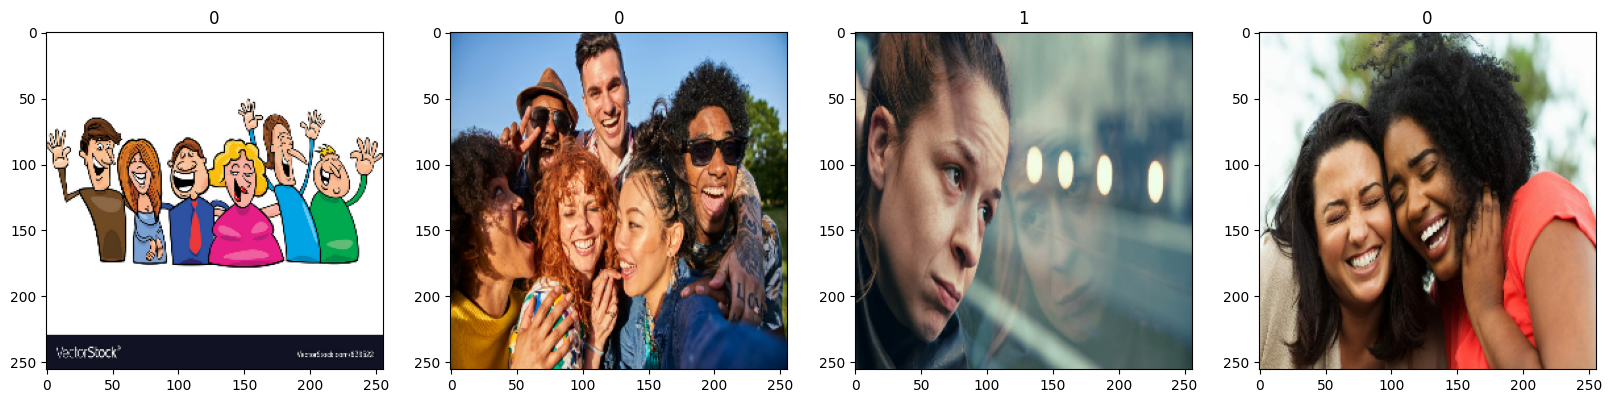

In [333]:
fig, ax = plt.subplots(ncols = 4 , figsize = (20,20))
for idx, img  in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    

Manage Data

In [334]:
data = data.map(lambda x,y: (x/255, y))

In [335]:
data.as_numpy_iterator().next()

(array([[[[7.34264672e-01, 7.34264672e-01, 7.34264672e-01],
          [7.09314823e-01, 7.09314823e-01, 7.09314823e-01],
          [6.71791852e-01, 6.71791852e-01, 6.71791852e-01],
          ...,
          [7.85643339e-01, 7.85643339e-01, 7.85643339e-01],
          [4.80506331e-01, 4.80506331e-01, 4.80506331e-01],
          [7.42134988e-01, 7.42134988e-01, 7.42134988e-01]],
 
         [[7.69578755e-01, 7.69578755e-01, 7.69578755e-01],
          [6.93959892e-01, 6.93959892e-01, 6.93959892e-01],
          [7.21112192e-01, 7.21112192e-01, 7.21112192e-01],
          ...,
          [7.64691412e-01, 7.64691412e-01, 7.64691412e-01],
          [6.65416300e-01, 6.65416300e-01, 6.65416300e-01],
          [7.22272813e-01, 7.22272813e-01, 7.22272813e-01]],
 
         [[6.70249879e-01, 6.70249879e-01, 6.70249879e-01],
          [7.73530126e-01, 7.73530126e-01, 7.73530126e-01],
          [7.57340848e-01, 7.57340848e-01, 7.57340848e-01],
          ...,
          [7.45570421e-01, 7.45570421e-01, 7.4557

Scattering Data

In [336]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [337]:
train_size 

3

In [338]:
train = data.take(train_size)
value = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size) 

Specification Model 

In [339]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [340]:
from tensorflow.python.keras.models import Model 

In [341]:
from tensorflow.python.keras.models import Sequential 
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,Dropout

In [342]:
model = Sequential()

In [343]:
model.add(Conv2D(16,(3,30), 1, activation ='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1, activation ='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3), 1,activation = 'relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))



In [344]:
model.compile('adam', loss= tf.losses.BinaryCrossentropy(),metrics=['Accuracy'])

In [345]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 254, 227, 16)      4336      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 127, 113, 16)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 125, 111, 32)      4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 62, 55, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 60, 53, 16)        4624      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 30, 26, 16)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 12480)            

Training This Dataset

In [346]:
lgdir ='logs'

In [347]:
tensorboard_clback = tf.keras.callbacks.TensorBoard(log_dir=lgdir)

In [348]:
histo = model.fit(train,epochs = 33,validation_data = value, callbacks=[tensorboard_clback])

Epoch 1/33


3/3 [==============================] - 4s 837ms/step - loss: 1.4599 - Accuracy: 0.5000 - val_loss: 0.8150 - val_Accuracy: 0.3438
Epoch 2/33
3/3 [==============================] - 3s 784ms/step - loss: 0.7558 - Accuracy: 0.4792 - val_loss: 0.6322 - val_Accuracy: 0.6250
Epoch 3/33
3/3 [==============================] - 3s 801ms/step - loss: 0.6622 - Accuracy: 0.6979 - val_loss: 0.6679 - val_Accuracy: 0.7500
Epoch 4/33
3/3 [==============================] - 4s 1s/step - loss: 0.6652 - Accuracy: 0.7188 - val_loss: 0.6709 - val_Accuracy: 0.7500
Epoch 5/33
3/3 [==============================] - 3s 782ms/step - loss: 0.6339 - Accuracy: 0.7500 - val_loss: 0.6151 - val_Accuracy: 0.6562
Epoch 6/33
3/3 [==============================] - 3s 797ms/step - loss: 0.6283 - Accuracy: 0.6250 - val_loss: 0.5935 - val_Accuracy: 0.6875
Epoch 7/33
3/3 [==============================] - 3s 863ms/step - loss: 0.5555 - Accuracy: 0.7292 - val_loss: 0.4929 - val_Accuracy: 0.7500
Epoch 8/33
3/3 [==================

Performance 

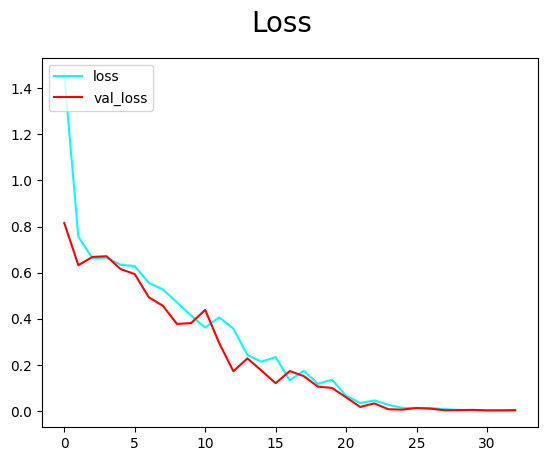

In [349]:
fig =  plt.figure()
plt.plot(histo.history['loss'], color = 'aqua', label = 'loss')
plt.plot(histo.history['val_loss'], color = 'Red',label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

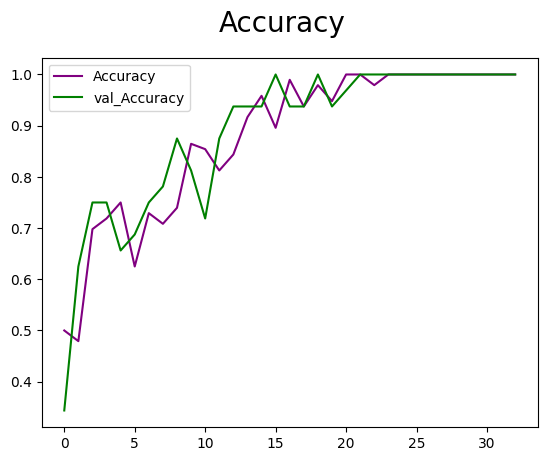

In [350]:
fig = plt.figure()
plt.plot(histo.history['Accuracy'], color='purple', label='Accuracy')
plt.plot(histo.history['val_Accuracy'], color='green', label='val_Accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()


Implementation Results

In [351]:
from tensorflow.python.keras.metrics import Precision, Recall, BinaryAccuracy

In [352]:
pre = Precision()
re = Recall()
bin_accu = BinaryAccuracy()

In [353]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    bin_accu.update_state(y,yhat)


In [354]:
print(pre.result(),re.result(),bin_accu.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


Evaulate

In [355]:
import cv2 

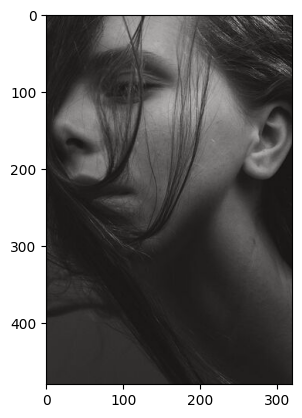

In [356]:
img = cv2.imread(r'C:\Users\shikh\OneDrive\Desktop\Code\pythom\DeepLearningWithKeras\data\sad\sadness.jpg')
plt.imshow(img)
plt.show()

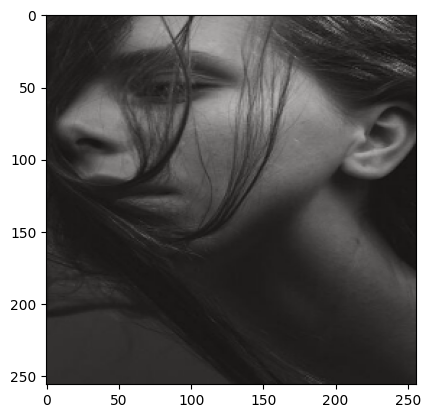

In [357]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [358]:
yhat = model.predict(np.expand_dims(resize/255,0))

In [359]:
yhat

array([[0.9982016]], dtype=float32)

In [360]:
if yhat > 0.5:
    print(f'Sad :(')
else:
    print(f'Happy :)')

Sad :(


Save

In [361]:
from tensorflow.python.keras.models import load_model 

In [362]:
model.save(os.path.join('models','imgemotionsclassfier.pth'))

INFO:tensorflow:Assets written to: models\imgemotionsclassfier.pth\assets


In [364]:
new_model = load_model(r'C:\Users\shikh\OneDrive\Desktop\Code\pythom\DeepLearningWithKeras\models\imgemotionsclassfier.pth')

In [365]:
new_model.predict(np.expand_dims(resize/255, 0 ))

array([[0.9982016]], dtype=float32)